# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1

from dsutils import *

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.
Using TensorFlow backend.


# Data

In [4]:
data = pd.read_csv('data.csv')

# Vectorizisation

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True)
vector = vectorizer.fit_transform(data['Text'].astype(str))

y=data['Spam'].astype('int').values

print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (31730, 282252)
Y shape (31730,)


# Machine Learning

In [6]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB


Mean Loss 0.6916482823826032 +- 0.004738300252039787


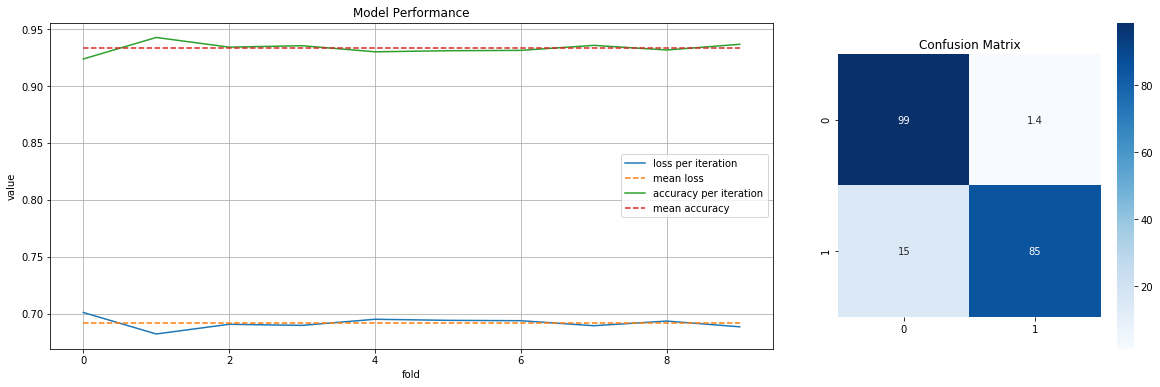

In [7]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB


Mean Loss 0.7589032461393004 +- 0.00308791647372602


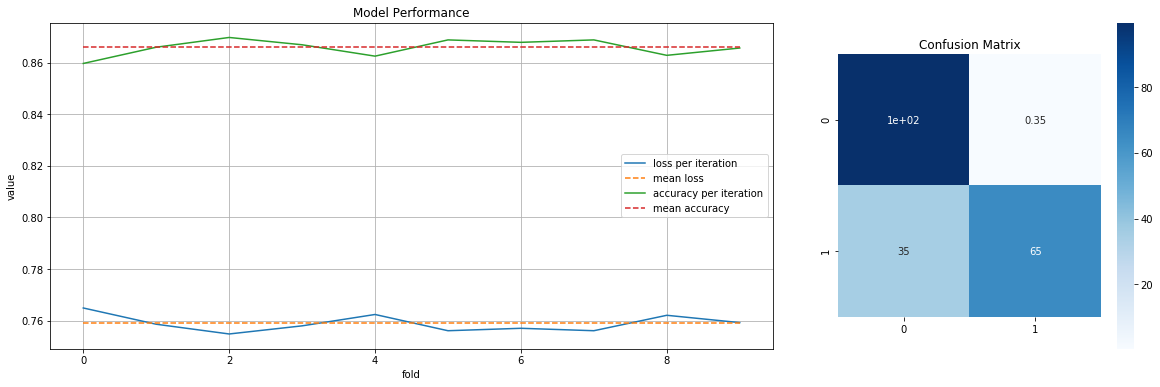

In [8]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression


Mean Loss 0.6603214623384809 +- 0.003900341255444051


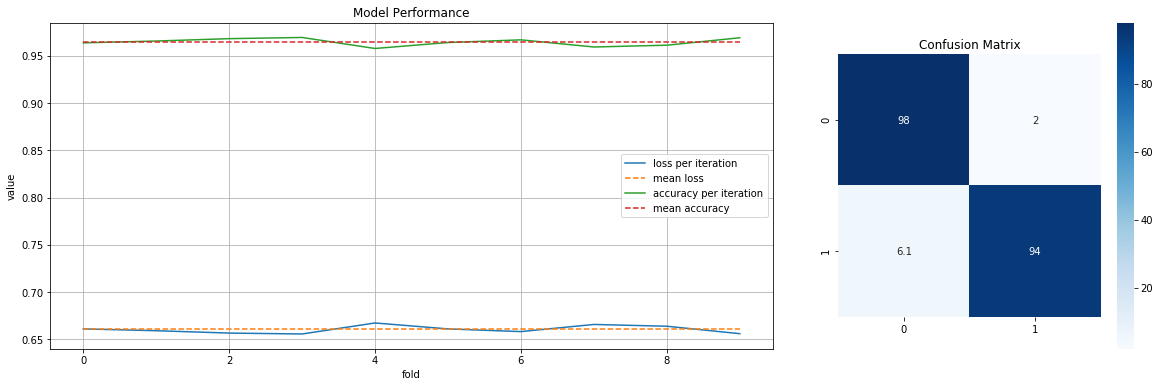

In [9]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, class_weight='balanced', random_state=101, 
                           warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))


Mean Loss 0.6543334383863851 +- 0.002582767254780692


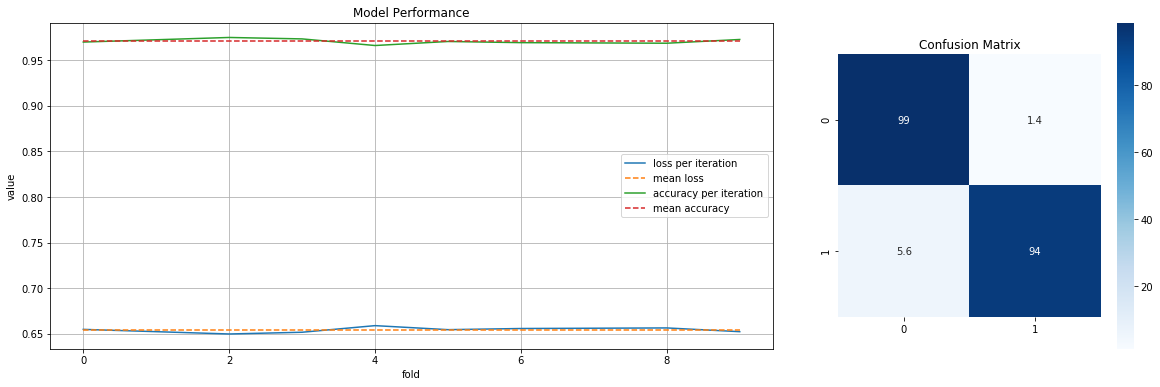

In [10]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss


Mean Loss 0.6748187834856603 +- 0.00309048866615348


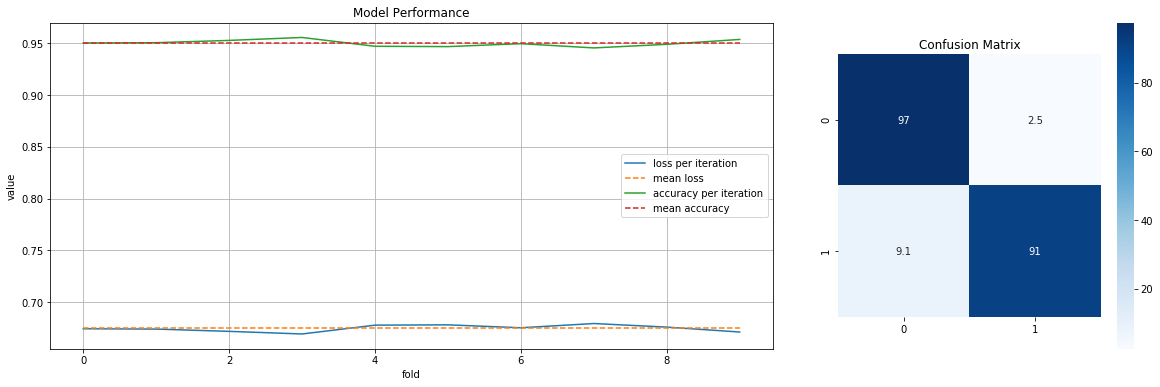

In [11]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True,
                      class_weight='balanced')
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))


Mean Loss 0.6609832965647651 +- 0.0020812438677717013


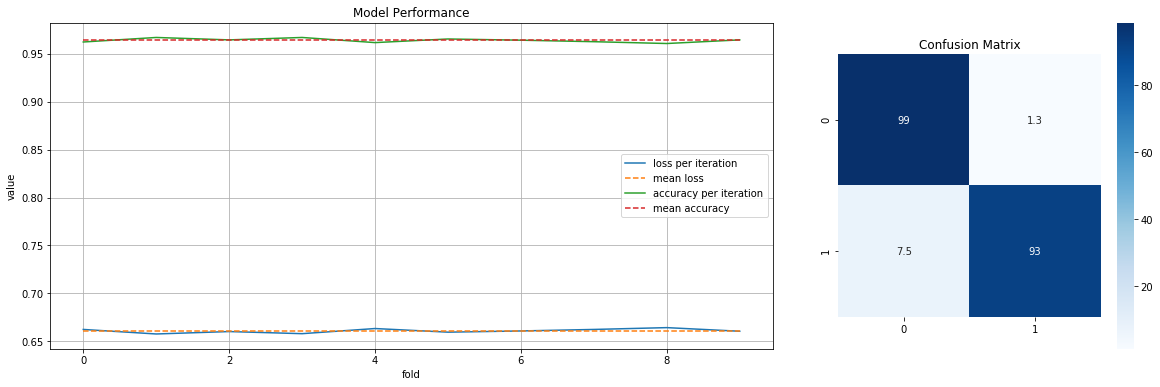

In [12]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss


Mean Loss 0.6661834226284273 +- 0.004180583523174387


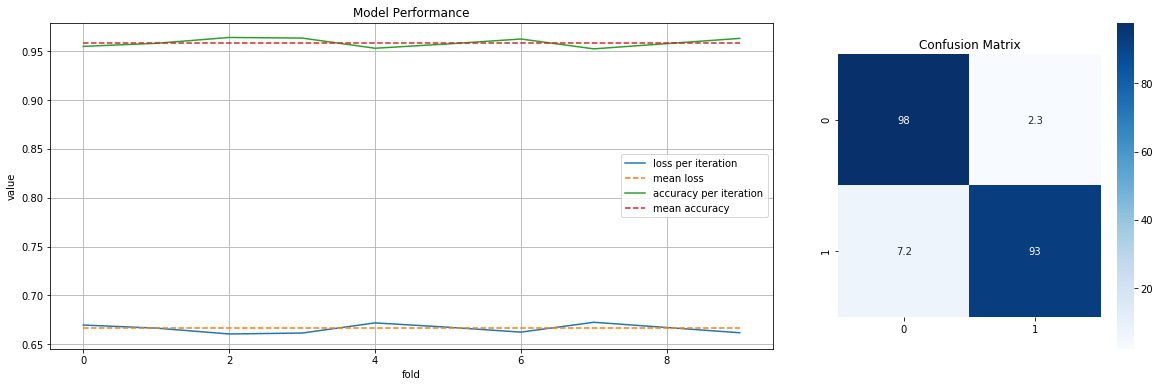

In [13]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))


Mean Loss 0.6503624330286795 +- 0.00253384824988866


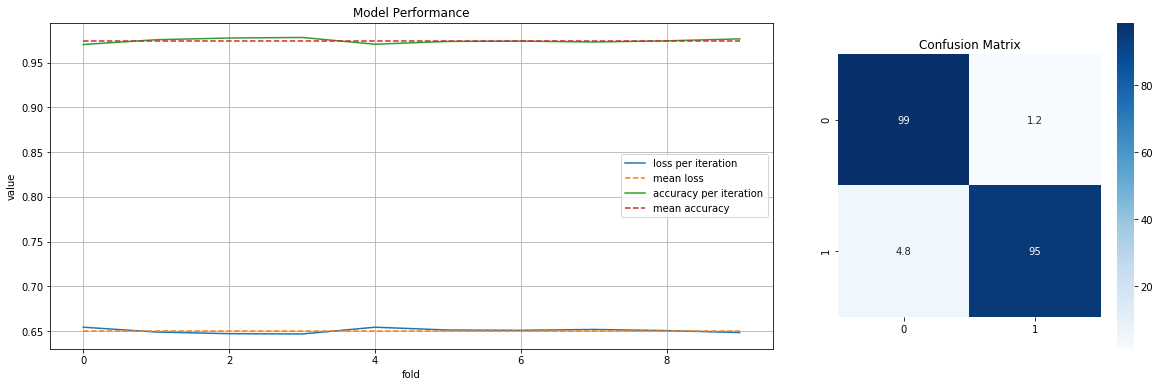

In [14]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss


Mean Loss 0.8180271036873622 +- 0.10416534065728528


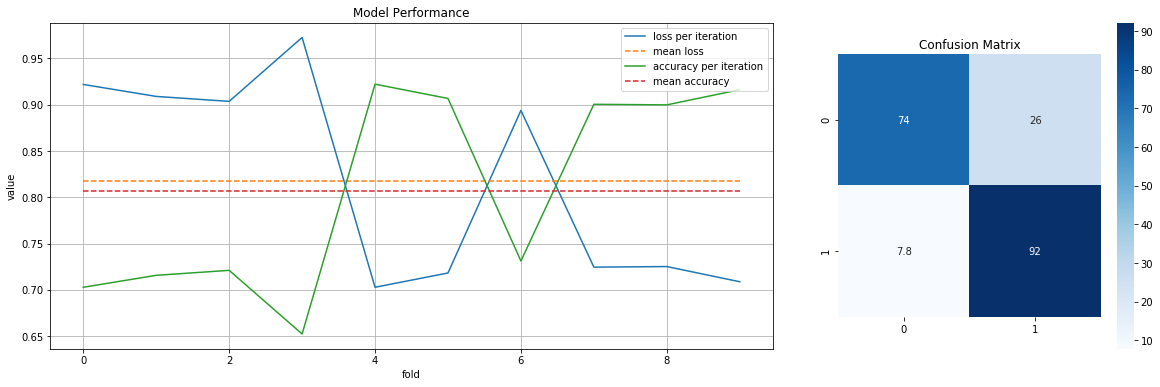

In [15]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))


Mean Loss 0.6540497951465489 +- 0.0024373440026455038


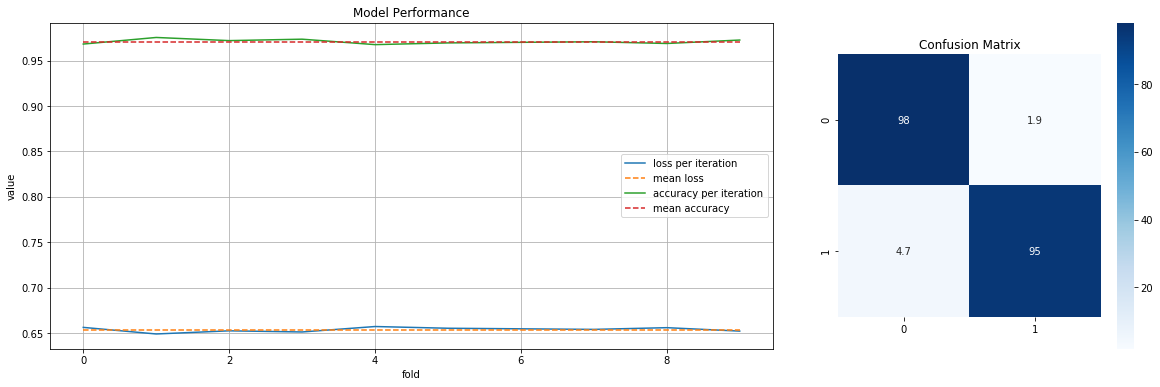

In [16]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree


Mean Loss 0.6769933816577371 +- 0.004257449090586496


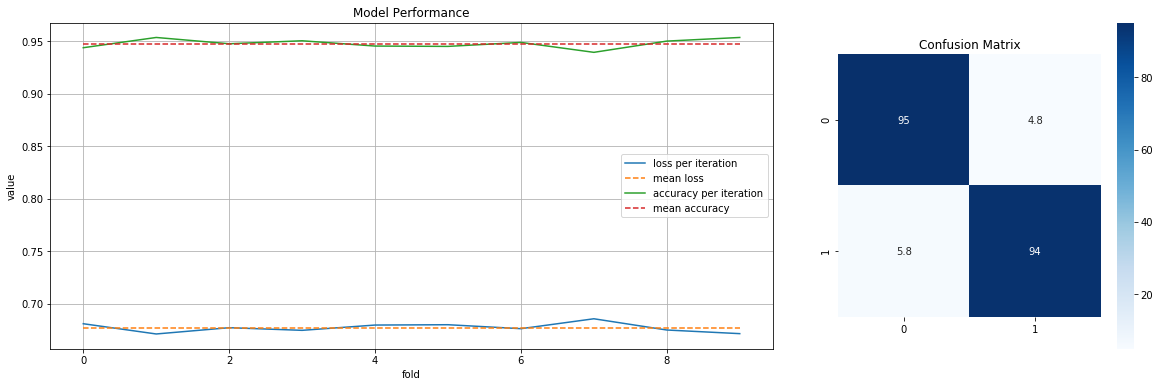

In [17]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [18]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [19]:
performance

,FP,FN
MultinomialNB,1.447513,15.391077
BernoulliNB,0.348001,35.150731
LogisticRegression1,2.012388,6.099337
LogisticRegression2,1.351666,5.603673
SGDClassifierL1,2.521765,9.115290
SGDClassifierL2,1.291159,7.477122
SGDClassifierH1,2.304905,7.174594
SGDClassifierH2,1.210450,4.780257
SGDClassifierP1,26.214539,7.831453
SGDClassifierP2,1.866150,4.671182



Mean Loss 0.6533564450047274 +- 0.0028063325710033


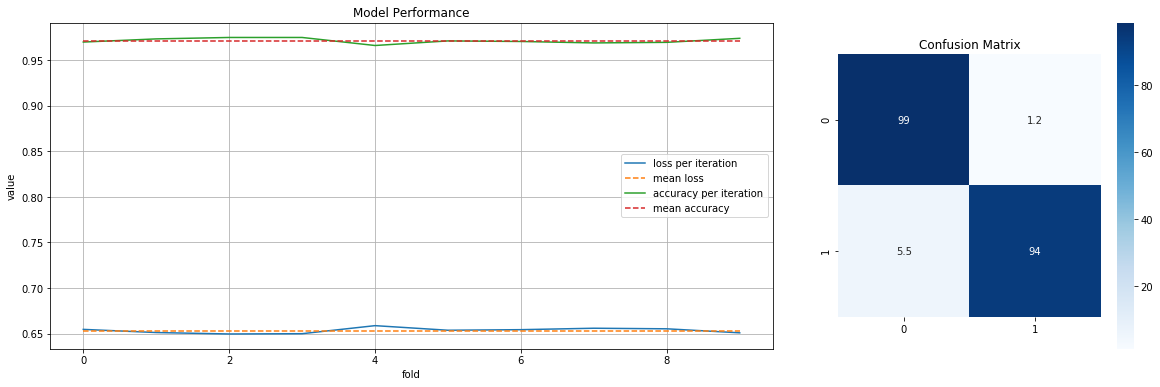

In [20]:
model = VotingClassifier(estimators=[
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('DT', DecisionTreeClassifier(class_weight='balanced', random_state=101))
], weights=[1.3, 1.3, 0.8, 1, 1, 1.4, 1.3, 0.9])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [21]:
pickle.dump(vectorizer, open('Vectorizer-spam-1.pkl', 'wb'))

In [22]:
pickle.dump(v_model, open('SpamClassifier-1.pkl', 'wb'))